In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [3]:
zonds = pd.read_excel('data/пример данных.xlsx', sheet_name='зонды')
clusters = pd.read_excel('data/пример данных.xlsx', sheet_name='кластеры', skiprows=2)

In [4]:
zonds.info()
zonds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 6 columns):
well     3368 non-null int64
X        3368 non-null float64
Y        3368 non-null float64
depth    3368 non-null float64
q        3368 non-null float64
f        3368 non-null float64
dtypes: float64(5), int64(1)
memory usage: 158.0 KB


,well,X,Y,depth,q,f
count,3368.000000,3.368000e+03,3368.000000,3368.000000,3368.000000,3368.000000
mean,17.854216,1.473077e+06,338557.886446,11.230404,6.318409,7.792429
std,9.975518,5.594032e+01,71.341247,5.730374,6.774257,6.815603
min,1.000000,1.472979e+06,338440.120000,1.600000,0.100000,0.000000
25%,9.000000,1.473041e+06,338506.010000,6.400000,1.300000,3.600000
50%,18.000000,1.473070e+06,338541.520000,11.200000,3.600000,5.600000
75%,26.000000,1.473121e+06,338608.570000,16.000000,9.200000,9.400000
max,35.000000,1.473176e+06,338686.280000,23.000000,29.800000,48.000000


In [16]:
clusters['p_code'] = clusters['poroda'].astype('category').cat.codes
f_obj = ['well']
f_coords = ['X','Y','depth']
f_cat = ['poroda', 'p_code']
f_clust = clusters.columns.drop(f_cat).drop(f_coords).drop(f_obj)
f_zonds = zonds.columns.drop(f_obj).drop(f_coords)
wells = pd.unique(zonds['well'])
resp = ['poroda']
# zonds.head()

In [22]:
np.array(f_clust.tolist() + resp)

array(['q', 'f', 'R1', 'R2', 'R3', 'poro', 'step_vlag', 'deform',
       'uplotnenie', 'sceplrnie', 'ugol_trenia', 'vlag_p', 'vlag_t',
       'vlag_r', 'plastichnost', 'tekuchest', 'organika', 'poroda'],
      dtype='<U12')

In [6]:
clusters[f_clust].describe()

,q,f,R1,R2,R3,poro,step_vlag,deform,uplotnenie,sceplrnie,ugol_trenia,vlag_p,vlag_t,vlag_r,plastichnost,tekuchest,organika
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,3.674117,6.512814,2.677838,1.917973,1.514459,0.787568,0.928649,3.627684,0.074135,0.014331,24.371622,27.777027,31.787604,22.154140,10.124738,0.583541,4.208362
std,4.327905,4.074347,0.017848,0.095415,0.153606,0.187513,0.064941,1.817039,0.153201,0.008309,6.855685,7.562064,9.749028,5.311486,4.473874,0.325366,1.882296
min,0.400000,2.100000,2.650000,1.610000,1.240000,0.440000,0.730000,1.760000,0.000000,0.001000,17.000000,13.100000,20.351804,15.800000,2.400000,-0.830000,1.200000
25%,1.100000,3.600000,2.670000,1.842500,1.362500,0.620000,0.890000,2.352500,0.000000,0.008000,19.000000,21.450000,23.100000,17.111468,6.025000,0.453488,2.669444
50%,1.878306,4.900000,2.680000,1.920000,1.530000,0.750000,0.940000,2.985000,0.000000,0.013000,22.000000,26.250000,24.900000,19.900000,9.600000,0.625000,4.100000
75%,4.425000,9.290274,2.690000,1.990000,1.640000,0.960000,0.980000,4.022500,0.000000,0.022000,29.000000,34.000000,41.850000,27.400000,14.400000,0.747500,5.500000
max,23.609544,18.000000,2.720000,2.090000,1.850000,1.160000,1.000000,9.060000,0.673000,0.030000,41.000000,43.300000,48.200000,31.300000,17.000000,1.228521,9.760000


In [7]:
zonds[f_zonds].describe()

,q,f
count,3368.000000,3368.000000
mean,6.318409,7.792429
std,6.774257,6.815603
min,0.100000,0.000000
25%,1.300000,3.600000
50%,3.600000,5.600000
75%,9.200000,9.400000
max,29.800000,48.000000


In [8]:
zonds[zonds.well == 1]
poroda_group = clusters.groupby('p_code')

means = pd.DataFrame([poroda_group[fld].mean() for fld in ['q', 'f']])
std = np.transpose(pd.DataFrame([poroda_group[fld].std() for fld in ['q', 'f']]))

In [9]:
std[std['q'] != np.NaN]
clusters[clusters['p_code'] == 0]

,well,X,Y,depth,q,f,R1,R2,R3,poro,...,sceplrnie,ugol_trenia,vlag_p,vlag_t,vlag_r,plastichnost,tekuchest,organika,poroda,p_code
23,7,1473131.73,338646.54,24.6,23.609544,9.753698,2.66,2.09,1.79,0.49,...,0.002,38.0,16.8,21.855679,16.015845,5.839834,0.7,6.497809,песок мелкий серый карбонатны с твердыми включ...,0


In [10]:
cl_name = pd.DataFrame(pd.Series(pd.unique(clusters['poroda'])), columns=['poroda'])
idx = cl_name.keys()

In [11]:
cat = clusters.dtypes == object
cat_cols = clusters.columns[cat].tolist()

In [32]:
clusters[['q','f','p_code']].head()

,q,f,p_code
0,2.4,5.0,27
1,1.1,2.5,21
2,1.1,4.0,37
3,1.2,5.8,33
4,5.2,9.8,19


/home/ors/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ors/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ors/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ors/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/home/ors/anaconda3/lib/python3.6/site-packages/numpy/core/fromnum

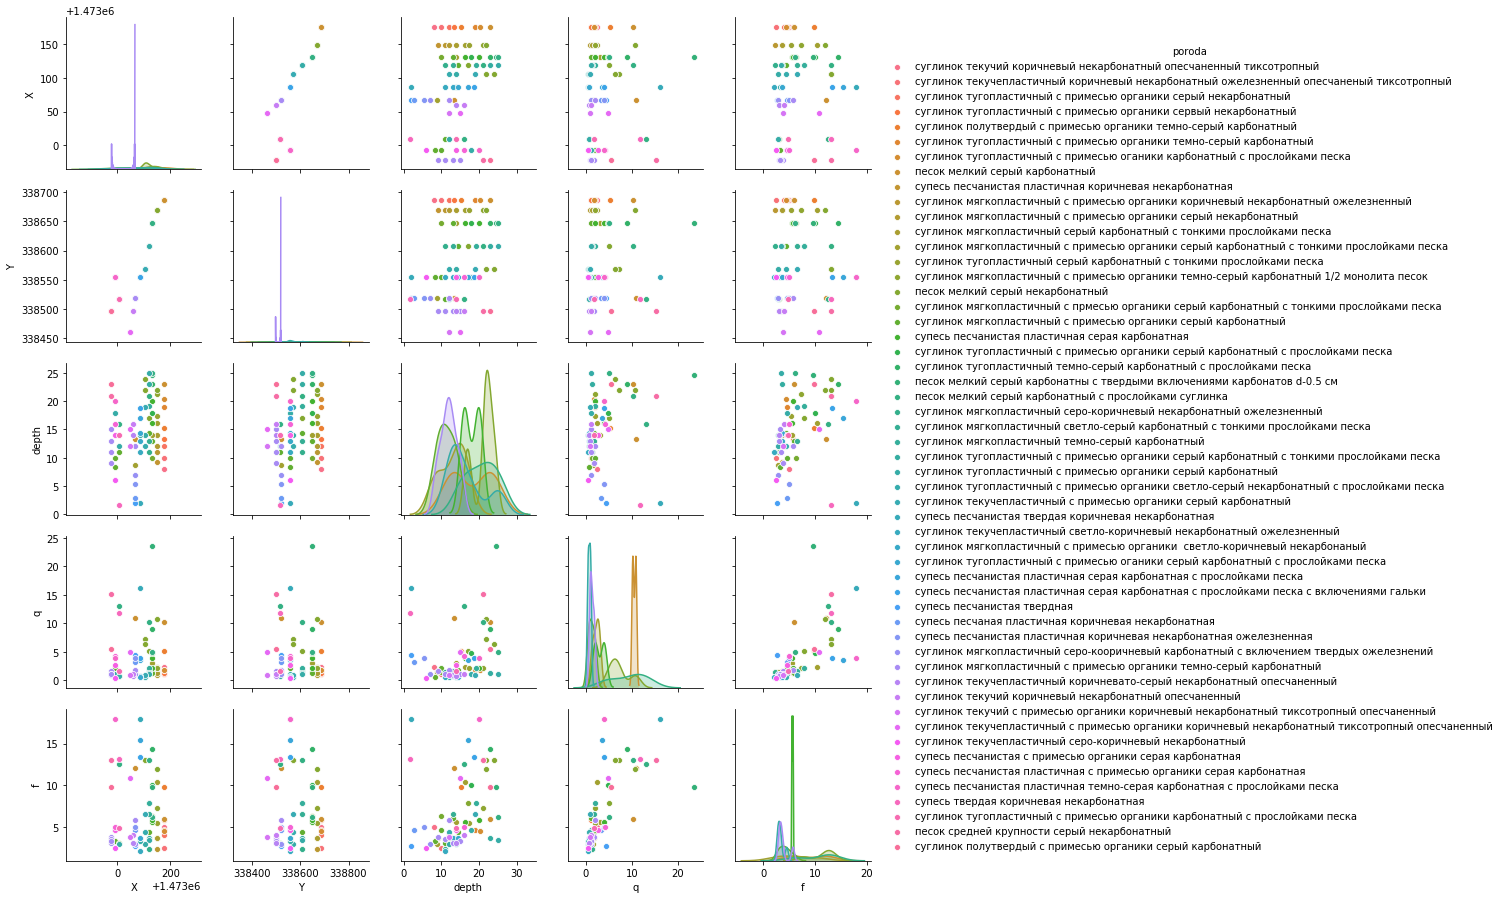

In [37]:
seaborn.pairplot(clusters[['X', 'Y', 'depth', 'q','f','poroda']], hue='poroda', diag_kind='kde')

/home/ors/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ors/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ors/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ors/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


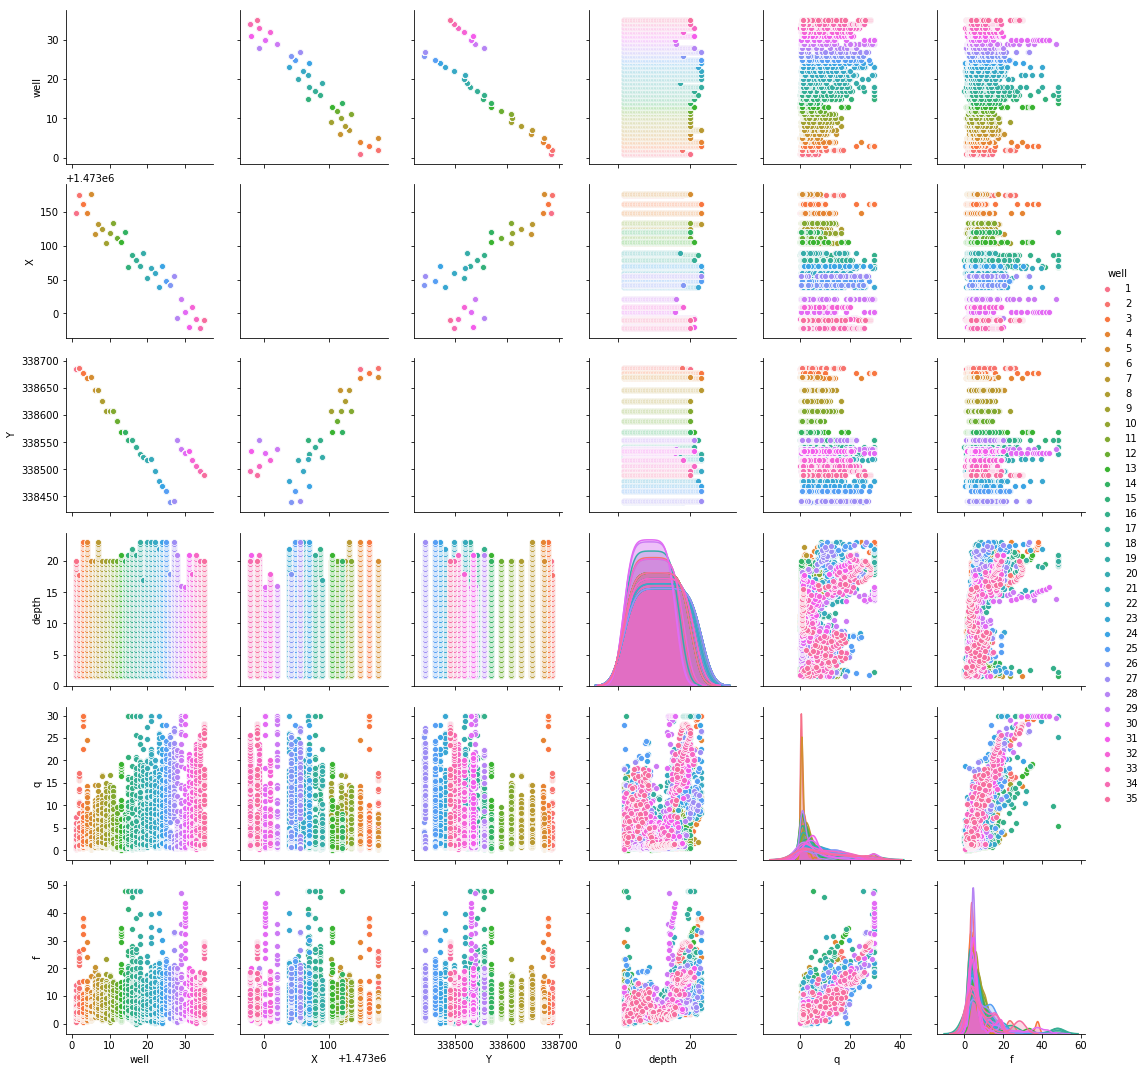

In [38]:
seaborn.pairplot(zonds, hue='well', diag_kind='kde')